In [ ]:
''' 
Erosion.- es una funcion morfologica que reduce el tamaño de las regiones brillantes en una imagen binaria.
dilatacion.- es una funcion morfologica que aumenta el tamaño de las regiones brillantes en una imagen binaria.
apertura.- es una operacion morfologica que consiste en aplicar una erosion seguida de una dilatacion. Se utiliza para eliminar ruido pequeño en la imagen.
estrechamiento.- es una operacion morfologica que consiste en aplicar una dilatacion seguida de una erosion. Se utiliza para cerrar pequeños agujeros en las regiones brillantes de la imagen.
los features son caracteristicas mas importante que se extraen de una imagen para su analisis o clasificacion.
Kernel.- es una matriz pequeña que se utiliza en operaciones de convolucion para aplicar efectos como desenfoque, nitidez, deteccion de bordes, etc. en una imagen.

'''


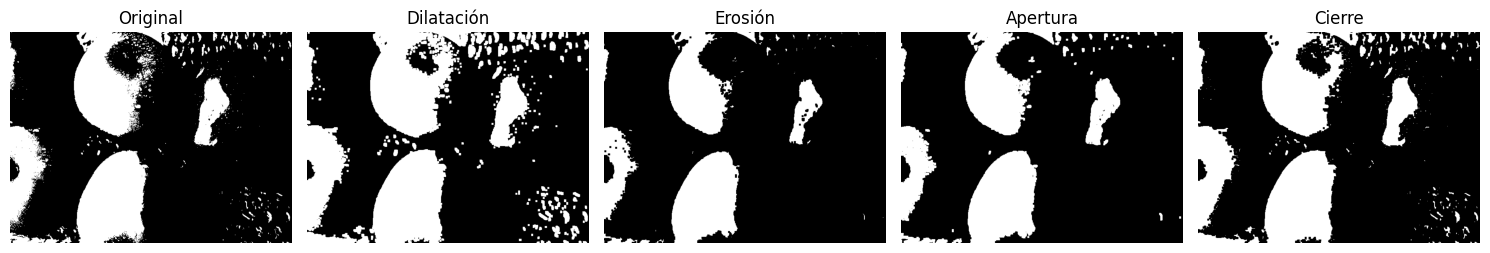

: 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Cargar imagen ===
# Usa tu propia imagen binaria en escala de grises
img = cv2.imread("manzana.jpg", cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError("No se pudo cargar la imagen, revisa la ruta.")

# Umbralizar para asegurar que sea binaria
_, binaria = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# === 2. Definir kernel ===
kernel = np.ones((5,5), np.uint8)   # puedes probar con tamaños 3x3, 7x7, etc.

# === 3. Operaciones morfológicas ===
dilatacion = cv2.dilate(binaria, kernel, iterations=1)
erosion    = cv2.erode(binaria, kernel, iterations=1)
apertura   = cv2.morphologyEx(binaria, cv2.MORPH_OPEN, kernel)
cierre     = cv2.morphologyEx(binaria, cv2.MORPH_CLOSE, kernel)

# === 4. Mostrar resultados ===
titulos = ["Original", "Dilatación", "Erosión", "Apertura", "Cierre"]
imagenes = [binaria, dilatacion, erosion, apertura, cierre]

plt.figure(figsize=(15,6))

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(imagenes[i], cmap="gray")
    plt.title(titulos[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
'''el openig es para eliminar ruido
el closing es para reconstruir informaciion de la imagenes
----------------------------------------------------------------
-------------------workflow flujo de trabajo--------------------

1. detectar (se detecta lo que se quiere analizar)
2. decriptor (comparacion de caracteristicas con algo ya conocido)
3. almacenar y hacer un matching (almacenamiento y comparacion con una base de datos)
4. invarianza (es que tan relacionado estan las caracteristicas con la imagen original)
-----------------------------------------------------------------------
--------------------DETECTORES---------------------------

1. detectores de esquinas (HARRIS, SHI-TOMASI)
2. detectores de blobs(manchas) (LAPLACIAN, DOG, LOG)
3. detectores de puntos clave (FAST, MSER)
4. detectores de bordes (CANNY, SOBEL, PREWITT)

---------------------------------------------------------------------------
--------------------DESCRIPTORES--------------------------- 
1. GRADIENTES (HOG, SIFT, SURF)(gradiente es el cambio de intensidad en la imagen)
2. BINARY DESCRIPTORS (ORB, BRIEF, BRISK) se basa en la fomra de la imagen
3. shape (Hu moments, LBP, Color histograms) se basa en histogramas de colores
---------------------------------------------------------------------------
--------------------FEATURES---------------------------
1.fetures locales (SIFT, SURF, ORB) son caracteristicas que se extraen de una parte especifica de la imagen
2.features globales (HOG, Color histograms) son caracteristicas que se extraen de toda la imagen 
Globales:
. colores histogramas
.textura (HOG)
. forma (Hu moments)
Locales:
. puntos clave (SIFT, SURF, ORB)



'''


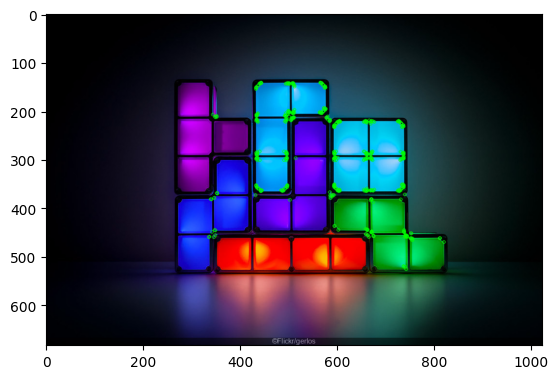

In [3]:
import cv2
import numpy as np  
import matplotlib.pyplot as plt
img=cv2.imread("bordes_tetris.jpg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Detectores de esquinas
corners = cv2.goodFeaturesToTrack(gray, 50, 0.01, 10)
# Dibujar esquinas
orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(gray, None)
plt.imshow(img, cmap='gray')

plt.imshow(cv2.drawKeypoints(img, keypoints, None, color=(0,255,0)))
plt.show()

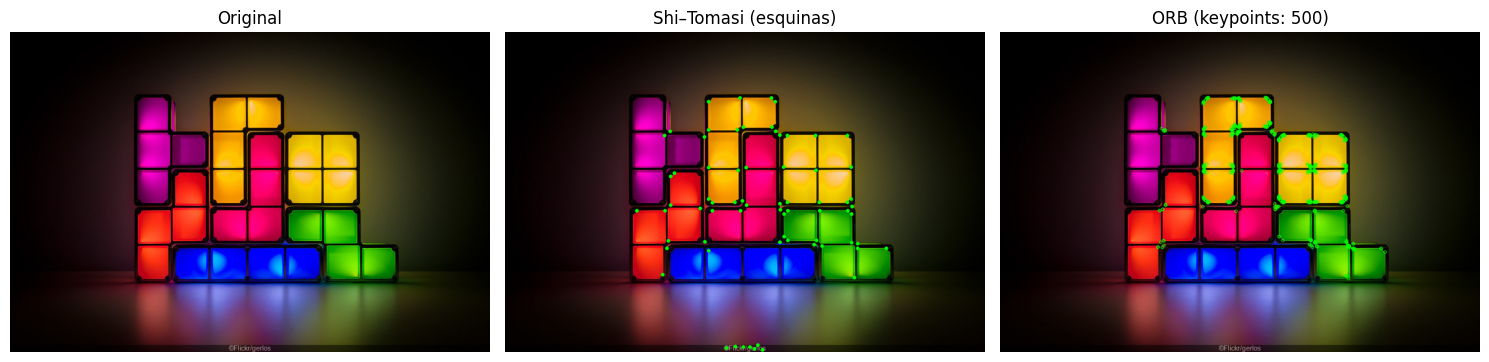

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1) Cargar imagen
img = cv2.imread("bordes_tetris.jpg")
if img is None:
    raise FileNotFoundError("No se pudo abrir 'bordes_tetris.jpg'. Revisa la ruta.")

# Para mostrar con matplotlib (usa RGB, no BGR)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2) Esquinas con Shi–Tomasi (goodFeaturesToTrack)
# maxCorners, qualityLevel, minDistance se pueden ajustar
corners = cv2.goodFeaturesToTrack(
    image=gray,
    maxCorners=70,
    qualityLevel=0.01,
    minDistance=10
)

img_corners = img.copy()
if corners is not None:
    corners = np.intp(corners)  # entero apropiado para dibujar
    for c in corners:
        x, y = c.ravel()
        cv2.circle(img_corners, (x, y), 4, (0, 255, 0), -1)  # verde en BGR
else:
    print("No se detectaron esquinas con Shi–Tomasi.")

# 3) Keypoints con ORB
orb = cv2.ORB_create(nfeatures=500)
keypoints, descriptors = orb.detectAndCompute(gray, None)

img_orb = cv2.drawKeypoints(
    image=img,
    keypoints=keypoints,
    outImage=None,
    color=(0, 255, 0),  # verde en BGR
    flags=cv2.DrawMatchesFlags_DEFAULT
)

# 4) Mostrar resultados (convertir a RGB para matplotlib)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img_corners, cv2.COLOR_BGR2RGB))
plt.title("Shi–Tomasi (esquinas)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img_orb, cv2.COLOR_BGR2RGB))
plt.title(f"ORB (keypoints: {len(keypoints) if keypoints else 0})")
plt.axis("off")

plt.tight_layout()
plt.show()


In [24]:
import cv2
import numpy as np  
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
img1 = cv2.imread("bordes_tetris.jpg")
img2 = cv2.imread("bordes_tetris3.jpg")

hist1 = cv2.calcHist([img1], [0], None, [256], [0,256]).flatten()
hist2 = cv2.calcHist([img2], [0], None, [256], [0,256]).flatten()

hist1 = hist1 / hist1.sum()
hist2 = hist2 / hist2.sum() # normalizar    
print("variance1:", np.var(hist1))
print("variance2:", np.var(hist2))
rh0, _ = pearsonr(hist1, hist2)
print("correlacion entre hist1 y hist2:", rh0)

variance1: 0.00017245788
variance2: 0.00053050165
correlacion entre hist1 y hist2: 0.40382254
